#**Twitter sentiment analysis**

Sentiment analysis is going to be applied to check what Twitter users think about **vaccines**, a very controversial topic.

For this, *VADER* will be used. *VADER* ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both **polarity** (positive/negative) and **intensity** (strength) of emotion. It is available in the **NLTK** package and can be applied directly to unlabeled text data.





## 1.   **Installing necessary Python Packages**



In [4]:
!pip install tweepy # library for collecting the tweets
!pip install pandas # data analysis and manipulation tool
!pip install nltk # use the VADER lexicon and also stem and lemmatize tweets
!pip install tweet-preprocessor # helpful for cleaning the tweets
!pip install matplotlib # for visualizing sentiments percentage over the total (pie chart)
!pip install wordcloud # for visualizing worclouds of positive and negative tweets 
!pip install pathlib # representing filesystem paths with semantics appropriate for different operating systems



## 2.   **Import Python Packages**



In [5]:
import json
import tweepy
import pandas as pd
from pathlib import Path
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import preprocessor as p
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud



## 3.   **Retrieve tweets and store in a dataframe**



Download tweets CSV file here: https://drive.google.com/file/d/1PcJMRDB6E5_ncnTrsNpniXT5V_CQIIuE/view?usp=sharing

Upload it to your gdrive (change file and dataframe paths if necessary)

In [9]:
# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

data = Path('/gdrive/My Drive/tweets.csv')
if data.is_file():
    # File exists
    df = pd.read_csv('/gdrive/My Drive/tweets.csv')
else:
    # Load Twitter API credentials from json file
    with open("cred.json", "r") as file:
        creds = json.load(file)
    
    client = tweepy.Client(bearer_token=creds['BEARER_TOKEN'], consumer_key=creds['CONSUMER_KEY'],
                       consumer_secret=creds['CONSUMER_SECRET'],
                       access_token=creds['ACCESS_TOKEN'], access_token_secret=creds['ACCESS_SECRET'],
                       wait_on_rate_limit=True)

    # Tweets in english language about vaccines that are not retweets
    query = 'lang:en -is:retweet (#vaccine OR #vaccines OR #vaccinated)'
    
    # List of tweets 
    tweets = []
    
    # Retrieve tweets
    for tweet in tweepy.Paginator(client.search_recent_tweets, query=query, max_results=100).flatten(limit=20000):
        tweets.append(tweet.text)
    
    # Create dataframe from list
    df = pd.DataFrame(tweets, columns = ['tweet'])
    
    # Save as CSV
    df.to_csv('tweets.csv', index=False, header=True)

Mounted at /gdrive




## 4.   **Visualize first 20 rows of dataframe**



In [10]:
df.head(20)

,tweet
0,Vaccination will help us restore the social fr...
1,@NSWHealth Madness! The Covid19 vaccine leaks ...
2,People of all ages can be affected by #COVID-1...
3,@Micheal01905053 And a healthy juice diet kill...
4,#Myocarditis #VaccineSideEffects \n50% death i...
5,@SkyNews Yes #GetBoosted asap if you are eligi...
6,If I’d have had the #vaccine I’d seriously be ...
7,Your community depends on you. Want to help st...
8,"Yes lots, including ourselves \nBut they are a..."
9,Is it just me or have heart related deaths inc...




## 5.   **Clean tweets**



In [12]:
# Remove puntuation marks, stopwords, links, emojis, mentions, stemming, lemmatize, tokenize

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

def remove_mentions_links_emojis(text):
    p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.SMILEY, p.OPT.NUMBER)
    # Remove hashtag sign but keep the text
    text = text.replace("#", "").replace("_", " ") 
    # Remove URLs, emojis, mentions...
    return p.clean(text)

def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]
	
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]


def stemming(text):
    ps = PorterStemmer()
    return [ps.stem(word) for word in text]


def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

def return_sentences(tokens):
    return " ".join([word for word in tokens])

def preprocess_text(text):
    return return_sentences(
    lemmatize(stemming(remove_stopwords(remove_small_words(
                   (tokenize(remove_punct(remove_mentions_links_emojis(text)))))))))

# Download necessary NLTK packages for preprocessing the text
nltk.download('stopwords')
nltk.download('wordnet')

# Apply preprocessing function to tweets
df['tweet_clean'] = df['tweet'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!




## 6.   **Visualize cleaned tweets**



In [15]:
df[['tweet_clean']].head(20)

,tweet_clean
0,vaccin help restor social freedom yearn return...
1,mad covid19 vaccin leak caus variant govern br...
2,peopl age affect covid19 getvaccin protect aro...
3,healthi juic diet kill shane warn accord scumm...
4,myocard vaccinesideeffect death
5,getboost asap elig
6,vaccin serious go cardiogram amount peopl drop...
7,commun depend want help stop spread covid19 ge...
8,lot includ wear ffp2 ffp3 mask shop publictran...
9,heart relat death increas exponenti vaccinesid...




## 7.   **Perform Sentiment Analysis**








### 7.1   **Download VADER lexicon**



In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True



### 7.2   **Update VADER lexicon**



The lexicon is adapted to the context of the problem to obtain better results

- A *1* is assigned to those terms that express being in **favor** of vaccines
- A *-1* is assigned to those terms that express being **against** vaccines

In [17]:
# Manual dictionary for this use case
word_dict = {'live':1, 'care':1, 'safeguard':1, 'help':1,'booster':1,'uniti':1,'vaccineswork':1, 'getvaccin':1, 'getvaccinatednow':1, 'getboost':1,
             'kill':-1,'injuri':-1,'harm':-1,'death':-1, 'cancer':-1, 'risk':-1, 'die':-1, 'vaccinedeath':-1, 'vaccineinjuri':-1, 'vaccinesideeffect':-1
             }

sid = SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)



### 7.3   **Get sentiment scores (positive, neutral, negative and compound)**



The **negative**, **neutral**, and **positive** add up to 1 and can’t be negative.

The **compound score** is calculated by normalizing the positive, negative, and neutral scores. It can range from -1 to 1
- If the compound score is closer to 1, then the tweet is more likely to be positive. 
- If it is closer to -1, then the tweet is more likely to be negative.

In [18]:
positive_scores = []
neutral_scores = []
negative_scores = []
compound_scores = []

for tweet in df['tweet_clean']:
    positive_scores.append((sid.polarity_scores(str(tweet)))['pos'])
    neutral_scores.append((sid.polarity_scores(str(tweet)))['neu'])
    negative_scores.append((sid.polarity_scores(str(tweet)))['neg'])
    compound_scores.append((sid.polarity_scores(str(tweet)))['compound'])

# Lists to dataframe
df['pos'] = pd.Series(positive_scores)
df['neg'] = pd.Series(negative_scores)
df['neu'] = pd.Series(neutral_scores)
df['compound'] = pd.Series(compound_scores)
df.head(20)

,tweet,tweet_clean,pos,neg,neu,compound
0,Vaccination will help us restore the social fr...,vaccin help restor social freedom yearn return...,0.360,0.000,0.640,0.7351
1,@NSWHealth Madness! The Covid19 vaccine leaks ...,mad covid19 vaccin leak caus variant govern br...,0.153,0.493,0.354,-0.8591
2,People of all ages can be affected by #COVID-1...,peopl age affect covid19 getvaccin protect aro...,0.397,0.000,0.603,0.5574
3,@Micheal01905053 And a healthy juice diet kill...,healthi juic diet kill shane warn accord scumm...,0.000,0.270,0.730,-0.7579
4,#Myocarditis #VaccineSideEffects \n50% death i...,myocard vaccinesideeffect death,0.000,0.800,0.200,-0.4588
5,@SkyNews Yes #GetBoosted asap if you are eligi...,getboost asap elig,0.500,0.000,0.500,0.2500
6,If I’d have had the #vaccine I’d seriously be ...,vaccin serious go cardiogram amount peopl drop...,0.191,0.424,0.385,-0.6393
7,Your community depends on you. Want to help st...,commun depend want help stop spread covid19 ge...,0.461,0.191,0.348,0.2732
8,"Yes lots, including ourselves \nBut they are a...",lot includ wear ffp2 ffp3 mask shop publictran...,0.200,0.000,0.800,0.5423
9,Is it just me or have heart related deaths inc...,heart relat death increas exponenti vaccinesid...,0.000,0.400,0.600,-0.4588




### 7.4   **Assign a sentiment to the tweets**



**Compound score** will be used to classify tweets as *positive*, *neutral* or *negative*

In [20]:
def sentiment_category(compound_score):
    label = ''
    if(compound_score > 0):
        label = 'positive'
    elif(compound_score == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment'] = df['compound'].apply(sentiment_category) 
df.head(20)

,tweet,tweet_clean,pos,neg,neu,compound,sentiment
0,Vaccination will help us restore the social fr...,vaccin help restor social freedom yearn return...,0.360,0.000,0.640,0.7351,positive
1,@NSWHealth Madness! The Covid19 vaccine leaks ...,mad covid19 vaccin leak caus variant govern br...,0.153,0.493,0.354,-0.8591,negative
2,People of all ages can be affected by #COVID-1...,peopl age affect covid19 getvaccin protect aro...,0.397,0.000,0.603,0.5574,positive
3,@Micheal01905053 And a healthy juice diet kill...,healthi juic diet kill shane warn accord scumm...,0.000,0.270,0.730,-0.7579,negative
4,#Myocarditis #VaccineSideEffects \n50% death i...,myocard vaccinesideeffect death,0.000,0.800,0.200,-0.4588,negative
5,@SkyNews Yes #GetBoosted asap if you are eligi...,getboost asap elig,0.500,0.000,0.500,0.2500,positive
6,If I’d have had the #vaccine I’d seriously be ...,vaccin serious go cardiogram amount peopl drop...,0.191,0.424,0.385,-0.6393,negative
7,Your community depends on you. Want to help st...,commun depend want help stop spread covid19 ge...,0.461,0.191,0.348,0.2732,positive
8,"Yes lots, including ourselves \nBut they are a...",lot includ wear ffp2 ffp3 mask shop publictran...,0.200,0.000,0.800,0.5423,positive
9,Is it just me or have heart related deaths inc...,heart relat death increas exponenti vaccinesid...,0.000,0.400,0.600,-0.4588,negative


## 8.   **Results**

In [21]:
df[['tweet','sentiment']].head(15)

,tweet,sentiment
0,Vaccination will help us restore the social fr...,positive
1,@NSWHealth Madness! The Covid19 vaccine leaks ...,negative
2,People of all ages can be affected by #COVID-1...,positive
3,@Micheal01905053 And a healthy juice diet kill...,negative
4,#Myocarditis #VaccineSideEffects \n50% death i...,negative
5,@SkyNews Yes #GetBoosted asap if you are eligi...,positive
6,If I’d have had the #vaccine I’d seriously be ...,negative
7,Your community depends on you. Want to help st...,positive
8,"Yes lots, including ourselves \nBut they are a...",positive
9,Is it just me or have heart related deaths inc...,negative


It seems that in the last 7 days there has been a **diversity of opinions** on the subject

Let's make a plot showing the sentiment of all the tweets over the total



### 8.1   **Sentiments percentage over the total**



In [ ]:
total = len(df['sentiment'])
n_pos = len(df[df['sentiment']=='positive'])
n_neg = len(df[df['sentiment']=='negative'])
n_neu = len(df[df['sentiment']=='neutral'])

sentiments = ["Positive", "Negative", "Neutral"]
colors = ['yellowgreen','red', 'blue']

plt.pie([n_pos, n_neg, n_neu], labels = sentiments, autopct='%1.2f%%', colors = colors)
plt.show()

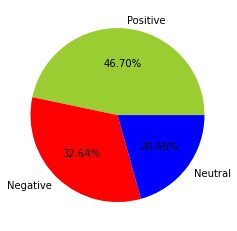

It can be seen that during these last 7 days most of the people are **in favor** of the vaccine. However, there is also a considerable number of users who are against it.



### 8.1   **Most frequent words for positive tweets**



In [ ]:
def plot_wordcloud(category:str):
    sentiment = df[df['sentiment']==category]
    wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="white").generate(str(sentiment['tweet_clean']))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Wordcloud for positive tweets
plot_wordcloud('positive')

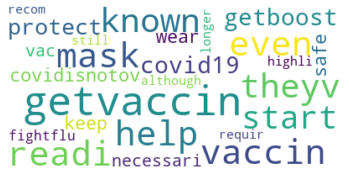

Words that indicate **positivity** towards the vaccine can be observed:
- help
- necessary
- safe
- protect
- get boost
- fight flu



### 8.2   **Most frequent words for negative tweets**



In [ ]:
plot_wordcloud('negative')

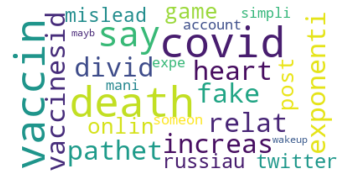

Words that indicate **negativity** towards the vaccine can be observed:
- death
- mislead
- fake
- divide
- pathetic
- wake up



## 9.   **Conclusion**




Sometimes users **use irony** or put hashtags that have nothing to do with their tweets, or **express the opposite idea**, and in that cases it is **difficult** to assign the **correct sentiment** in all the tweets. 

However, with this demo we have been able to get a **general idea** of what Twitter users think about vaccines. 




